# Graphics of Ne Line Ratios Histograms and Ne Line Ratios vs fracAGN

In [1]:
from astropy.table import Table, Column, table, vstack, join
from pathlib import Path

import numpy as np
import pandas as pd
import astropy.units as u

from matplotlib import pyplot as plt

In [2]:
path_CIGALE_phot = '../Datos/Work/CIGALE_InputPhot/'
path_CIGALE_out = '../Datos/Work/CIGALE_Output/'
path_graphs = '../Datos/Final/Graphics/'
path_FINAL = '../Datos/Final/'

In [3]:
Ne_Sy = Table.read(path_FINAL+'Ne_ratios_-_CIGALE_results.tbl', format='ascii')
Ne_Sy_bib = Table.read(path_FINAL+'Ne_ratios_-_CIGALE_results_bib.tbl', format='ascii')

In [4]:
Ne_Sy1 = Ne_Sy[Ne_Sy['otype']=='Sy1']
Ne_Sy2 = Ne_Sy[Ne_Sy['otype']=='Sy2']
Ne_SyG = Ne_Sy[Ne_Sy['otype']=='SyG']

Ne_Sy1_bib = Ne_Sy_bib[Ne_Sy_bib['otype']=='Sy1']
Ne_Sy2_bib = Ne_Sy_bib[Ne_Sy_bib['otype']=='Sy2']
Ne_SyG_bib = Ne_Sy_bib[Ne_Sy_bib['otype']=='SyG']

In [55]:
Ne_Sy1

Main_id,RA,DEC,otype,redshift,[NeV]/[NeII],[NeV]/[NeII]_err,[NeV]/[NeIII],[NeV]/[NeIII]_err,[NeIII]/[NeII],[NeIII]/[NeII]_err,bayes.agn.fracAGN,bayes.agn.fracAGN_err,bayes.agn.i,bayes.agn.i_err,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.stellar.m_star,bayes.stellar.m_star_err,best.reduced_chi_square,log.reduced_chi_square,log_[NeV]/[NeII],log_[NeV]/[NeIII],log_[NeIII]/[NeII],log_bayes.agn.fracAGN,log_bayes.sfh.sfr,log_bayes.stellar.m_star
str24,float64,float64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2E 2389,166.0577547903,76.98283181919,Sy1,0.3115,1.1556064073226544,0.17151303566833198,nan,nan,nan,nan,0.8188987719707819,0.024258975221072464,26.011843998959925,11.071888539354369,32.99957287515418,13.005716016371974,82007440862.93582,69392222513.68936,1.442908260688541,0.15923871976759285,0.06280994114823953,nan,nan,-0.08676978015852753,1.5185083186910966,10.913853259445968
2E 3648,245.09091058141,17.60665343366,Sy1,0.55517,1.7878787878787878,0.279439361062646,0.7391975308641976,nan,2.4545454545454546,0.2468333394786096,0.7373844941753334,0.09571439256469585,32.20528489575952,9.404682549643882,110.83038756721615,54.366157677823296,96631370793.32745,102566202983.27977,2.3766658631781086,0.37596812830862414,0.25233807176425666,-0.1312394924560301,0.3899710790007623,-0.13230599903922194,2.0446588519392694,10.985118140397837
2MASS J10514425+3539307,162.9343616698,35.65853695596999,Sy1,0.15879,0.9147727272727273,nan,0.5331125827814569,nan,1.7159090909090908,nan,0.7537377932886404,0.07254760485772928,65.85472114491778,5.52748358054517,0.33108489758117876,0.8959707709745757,108749084979.72922,38198739351.69081,1.4963006469332685,0.1750188637061186,-0.038686791782300105,-0.273181066925301,0.23449427514300075,-0.1227797081523727,-0.48006062911427727,11.036425611466434
2MASS J13000535+1632148,195.02228295163,16.53743305218,Sy1,0.07993,nan,nan,nan,nan,0.8682634730538922,nan,0.8997482762713642,0.0035397704007171173,60.00022899305476,0.047852752121327925,0.5592751145937703,0.3523226196938686,90494096430.65376,16511046241.395515,2.9185132854550697,0.4651616746160927,nan,nan,-0.0613484689126084,-0.045878976691224434,-0.25237450453202054,10.956620248031513
2MASSI J0918486+211717,139.7025485953,21.288075035289996,Sy1,0.14903,4.562118126272912,nan,1.7230769230769232,nan,2.6476578411405294,nan,0.8988839720632542,0.013870021401598235,44.20391814907898,14.529180682596715,0.5329401797567834,1.1935901737550823,152823017793.68384,53131442843.11487,0.9454285200616502,-0.024371300786463282,0.6591665262111943,0.23630466602732605,0.4228618601838683,-0.04629636337769971,-0.27332153592564123,11.18418877143811
2MASX J14510879+2709272,222.78651997439997,27.15748964087,Sy1,0.06449,5.266272189349112,nan,nan,nan,nan,nan,0.899955362964844,0.0014940994387965115,7.5626569304964075,7.822212659918313,0.15462531197470453,0.31682075857974806,26200318190.297752,11239826484.458948,1.2185272266241656,0.08583523745224399,0.7215033020312392,nan,nan,-0.04577903067045741,-0.8107194111218787,10.418306565649951
3C 234.0,150.45634473807,28.7858176354,Sy1,0.18494,4.125,1.3524428130239001,0.5468077474892397,0.06828504167318082,10.25,2.7077723778043086,0.8034799514202404,0.05075017016454414,63.91729158454189,4.881367022531865,35.95897699663074,10.767347614953854,81806980038.3679,33820452612.22372,2.5104372093516596,0.39974936334306105,0.6154239528859439,-0.26216534072457226,1.0107238653917732,-0.09502495536135583,1.555807327915531,10.912790360673998
7C 1821+6419,275.4883876131,64.34339480891,Sy1,0.297,1.8472727272727272,0.15141003725431723,0.48846153846153845,0.02311472217491531,3.7818181818181817,0.31056886962893887,0.6915592854364581,0.11269035291407396,33.40082195370531,10.102853041982137,489.74909023323397,166.51602998912847,245212945616.7012,240727355723.95312,2.0802254795831856,0.3181104115163454,0.26653101845365657,-0.3111696270148611

## Histograms of the Ne ratios

### [NeV]/[NeII]

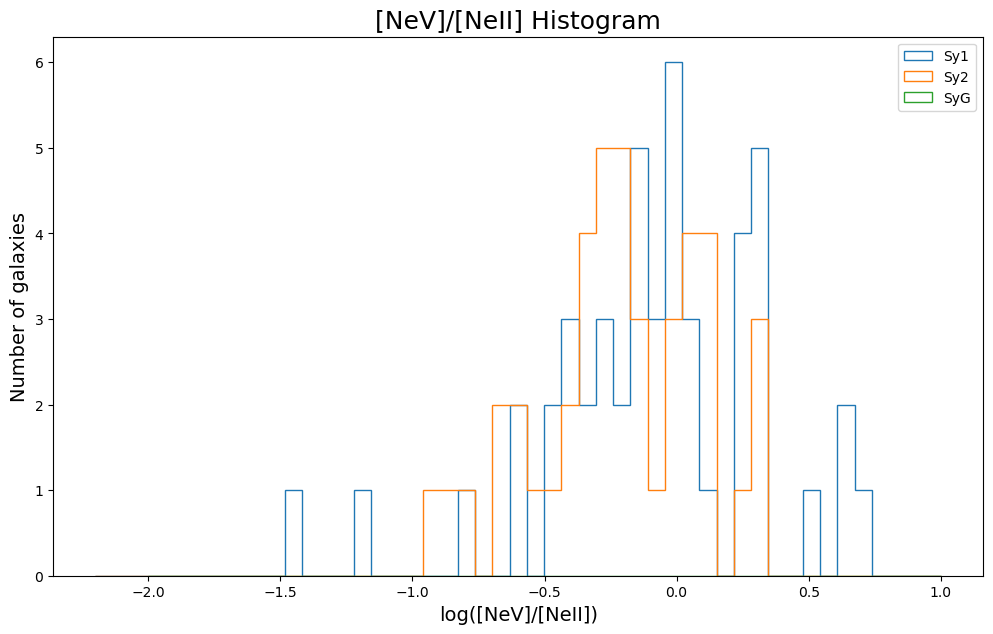

In [6]:
x_NeV_NeII_Sy1 = np.log10(Ne_Sy1['[NeV]/[NeII]'])
x_NeV_NeII_Sy2 = np.log10(Ne_Sy2['[NeV]/[NeII]'])
x_NeV_NeII_SyG = np.log10(Ne_SyG['[NeV]/[NeII]'])
bins_NeV_NeII_Sy1 = np.linspace(-2.2,1,50)
bins_NeV_NeII_Sy2 = np.linspace(-2.2,1,50)
bins_NeV_NeII_SyG = np.linspace(-2.,1,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeV_NeII_Sy1, bins=bins_NeV_NeII_Sy1, histtype='step', label='Sy1')
plt.hist(x_NeV_NeII_Sy2, bins=bins_NeV_NeII_Sy2, histtype='step', label='Sy2')
plt.hist(x_NeV_NeII_SyG, bins=bins_NeV_NeII_SyG, histtype='step', label='SyG')
plt.xlabel('log([NeV]/[NeII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeV]/[NeII] Histogram', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeII_Sy.jpg')

### [NeV]/[NeIII]

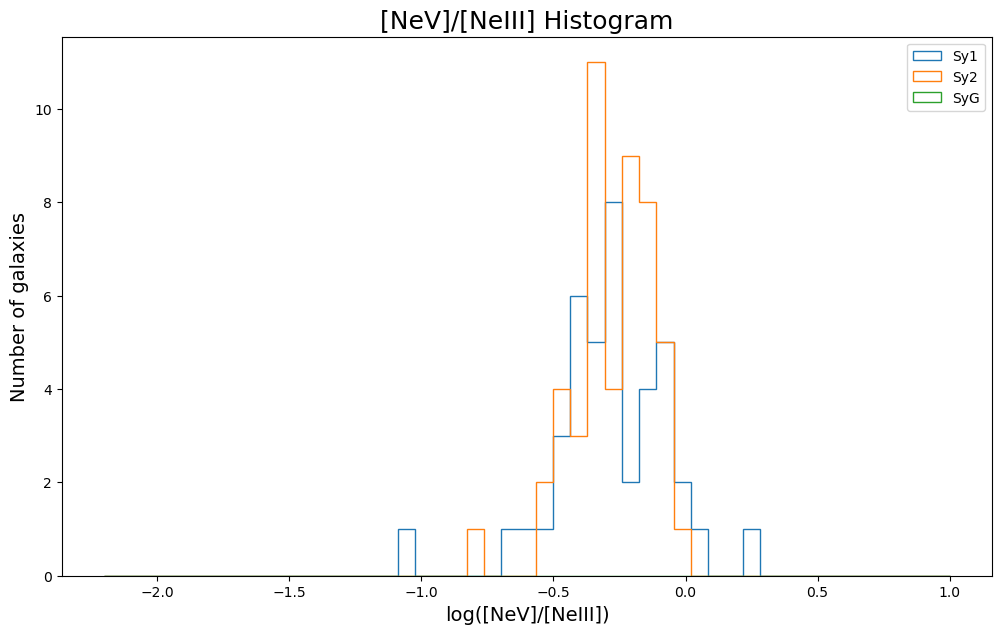

In [7]:
x_NeV_NeIII_Sy1 = np.log10(Ne_Sy1['[NeV]/[NeIII]'])
x_NeV_NeIII_Sy2 = np.log10(Ne_Sy2['[NeV]/[NeIII]'])
x_NeV_NeIII_SyG = np.log10(Ne_SyG['[NeV]/[NeIII]'])
bins_NeV_NeIII_Sy1 = np.linspace(-2.2,1,50)
bins_NeV_NeIII_Sy2 = np.linspace(-2.2,1,50)
bins_NeV_NeIII_SyG = np.linspace(-2.2,1,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeV_NeIII_Sy1, bins=bins_NeV_NeIII_Sy1, histtype='step', label='Sy1')
plt.hist(x_NeV_NeIII_Sy2, bins=bins_NeV_NeIII_Sy2, histtype='step', label='Sy2')
plt.hist(x_NeV_NeIII_SyG, bins=bins_NeV_NeIII_SyG, histtype='step', label='SyG')
plt.xlabel('log([NeV]/[NeIII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeV]/[NeIII] Histogram', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeIII_Sy.jpg')

### [NeIII]/[NeII]

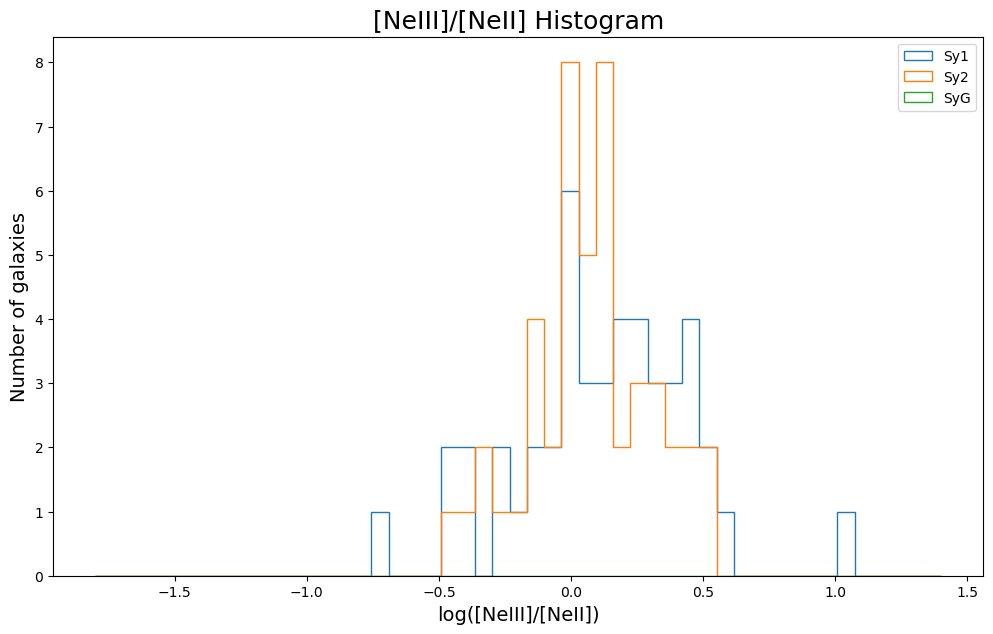

In [8]:
x_NeIII_NeII_Sy1 = np.log10(Ne_Sy1['[NeIII]/[NeII]'])
x_NeIII_NeII_Sy2 = np.log10(Ne_Sy2['[NeIII]/[NeII]'])
x_NeIII_NeII_SyG = np.log10(Ne_SyG['[NeIII]/[NeII]'])
bins_NeIII_NeII_Sy1 = np.linspace(-1.8,1.4,50)
bins_NeIII_NeII_Sy2 = np.linspace(-1.8,1.4,50)
bins_NeIII_NeII_SyG = np.linspace(-1.8,1.4,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeIII_NeII_Sy1, bins=bins_NeIII_NeII_Sy1, histtype='step', label='Sy1')
plt.hist(x_NeIII_NeII_Sy2, bins=bins_NeIII_NeII_Sy2, histtype='step', label='Sy2')
plt.hist(x_NeIII_NeII_SyG, bins=bins_NeIII_NeII_SyG, histtype='step', label='SyG')
plt.xlabel('log([NeIII]/[NeII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeIII]/[NeII] Histogram', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeIII_NeII_Sy.jpg')

## AGN Fraction vs Ne ratios

### [NeV]/[NeII]

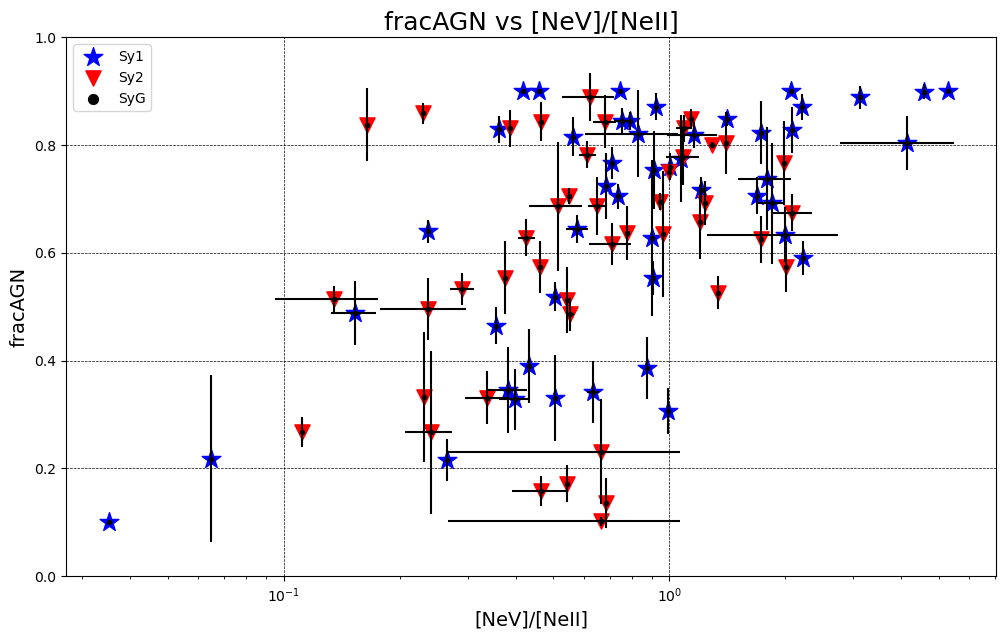

In [9]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1['[NeV]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1['[NeV]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_SyG['[NeV]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG['[NeV]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],\
             Ne_SyG['bayes.agn.fracAGN_err'], Ne_SyG['[NeV]/[NeII]_err'], fmt='k.')
plt.xlabel(r'[NeV]/[NeII]', fontsize=14)
plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeV]/[NeII]', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy.jpg')

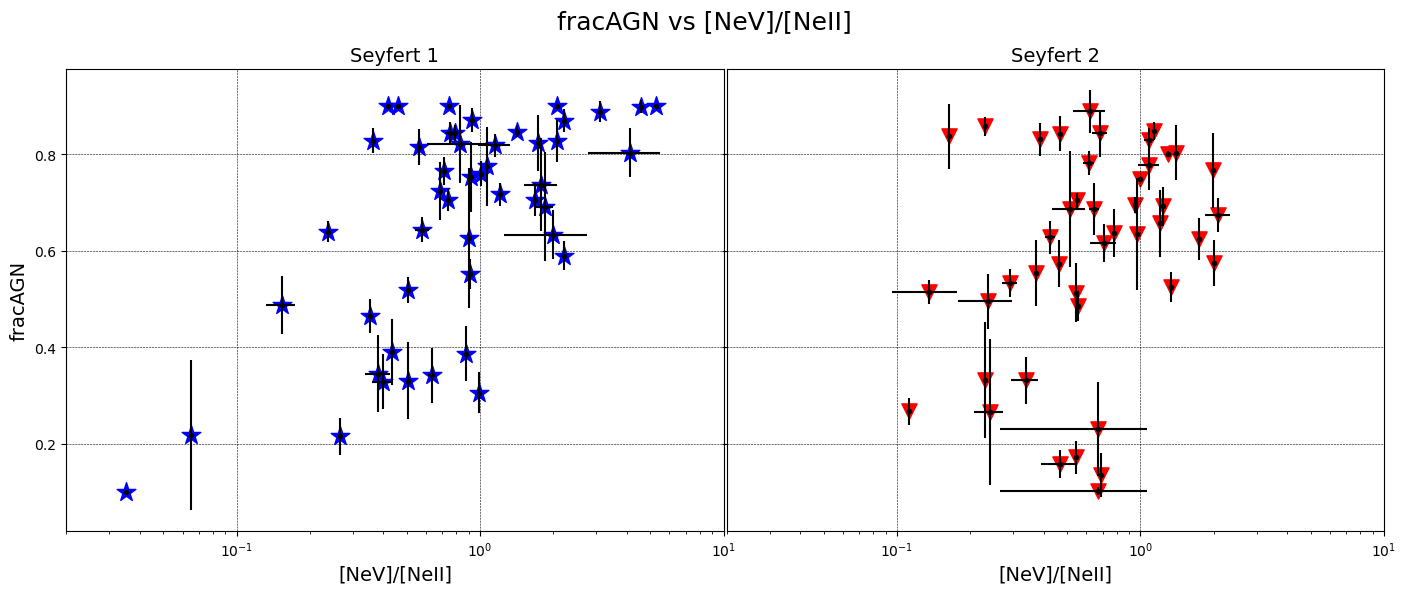

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeII]', fontsize=18)
ax1.scatter(Ne_Sy1['[NeV]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['[NeV]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xlim(20e-3,10e0) #ax1.set_xlim(20e-4,10e0)
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
#ax1.set_yscale("log")
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xlim(20e-3,10e0)#ax2.set_xlim(20e-4,10e0)
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
#ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy1_vs_Sy2.jpg')

### [NeV]/[NeIII]

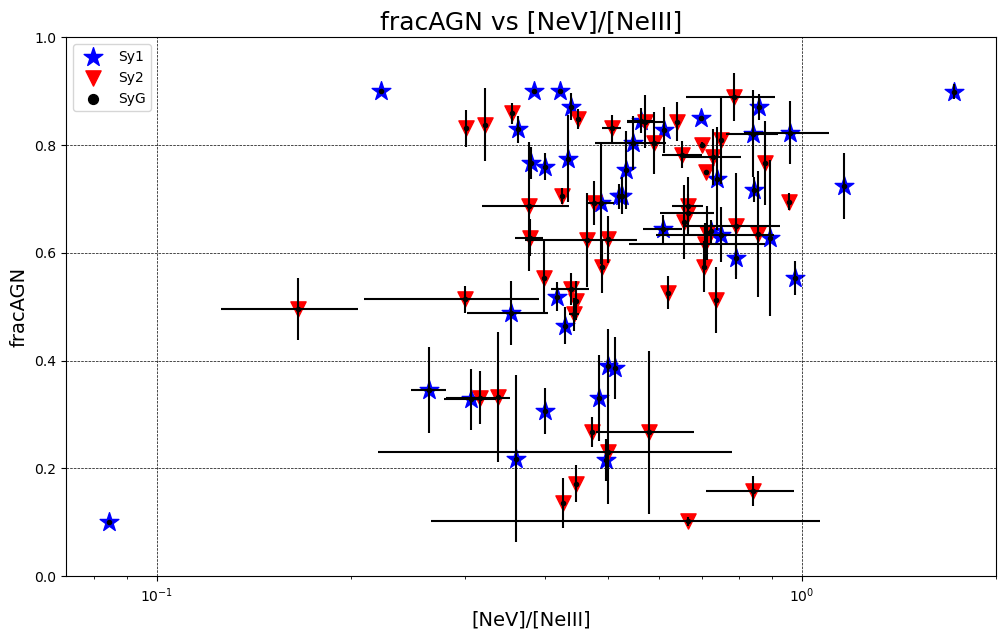

In [11]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1['[NeV]/[NeIII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1['[NeV]/[NeIII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeV]/[NeIII]_err'], fmt='k.')
plt.scatter(Ne_Sy2['[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2['[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeV]/[NeIII]_err'], fmt='k.')
plt.scatter(Ne_SyG['[NeV]/[NeIII]'], Ne_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG['[NeV]/[NeIII]'], Ne_SyG['bayes.agn.fracAGN'],\
             Ne_SyG['bayes.agn.fracAGN_err'], Ne_SyG['[NeV]/[NeIII]_err'], fmt='k.')
plt.xlabel(r'[NeV]/[NeIII]', fontsize=14)
plt.xscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeV]/[NeIII]', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeV_NeIII_vs_fracAGN_Sy.jpg')

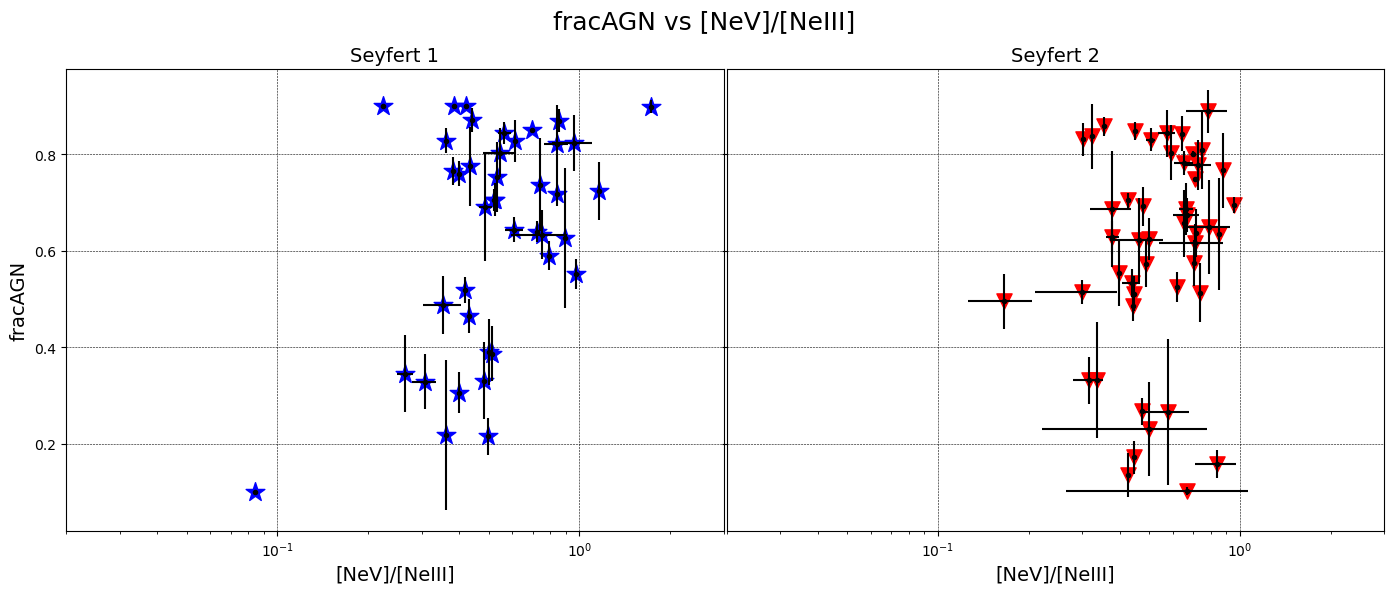

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeIII]', fontsize=18)
ax1.scatter(Ne_Sy1['[NeV]/[NeIII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['[NeV]/[NeIII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeV]/[NeIII]_err'], fmt='k.')
ax1.set_xlim(20e-3,3e0)
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeV]/[NeIII]', fontsize=14)
#ax1.set_yscale("log")
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeV]/[NeIII]_err'], fmt='k.')
ax2.set_xlim(20e-3,3e0)
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeV]/[NeIII]', fontsize=14)
#ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots
plt.savefig(path_graphs+'NeV_NeIII_vs_fracAGN_Sy1_vs_Sy2.jpg')

### [NeIII]/[NeII]

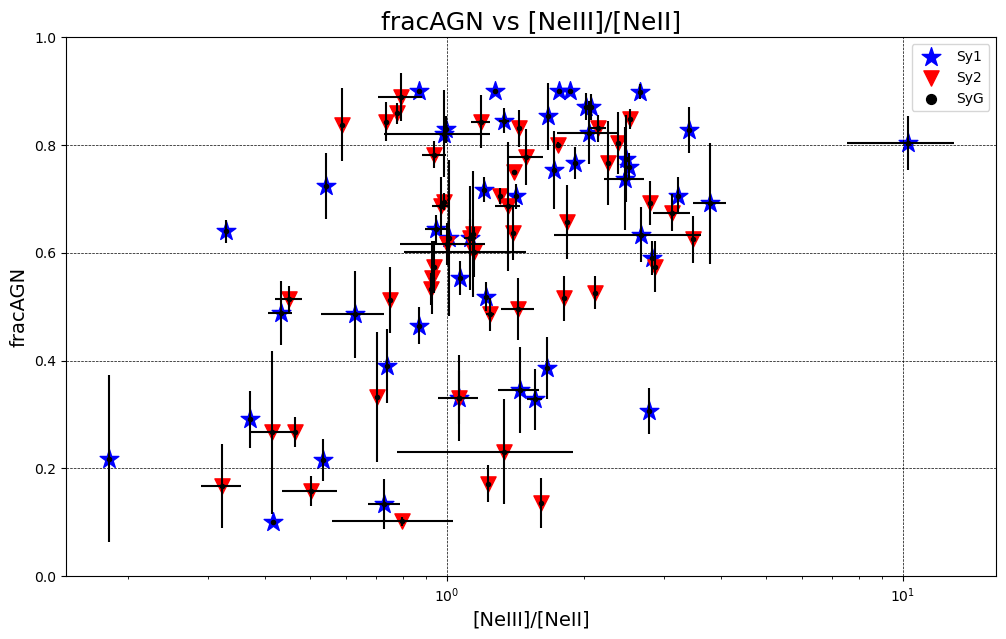

In [13]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1['[NeIII]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1['[NeIII]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeIII]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_Sy2['[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2['[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeIII]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_SyG['[NeIII]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG['[NeIII]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],\
             Ne_SyG['bayes.agn.fracAGN_err'], Ne_SyG['[NeIII]/[NeII]_err'], fmt='k.')
plt.xlabel(r'[NeIII]/[NeII]', fontsize=14)
plt.xscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeIII]/[NeII]', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeIII_NeII_vs_fracAGN_Sy.jpg')

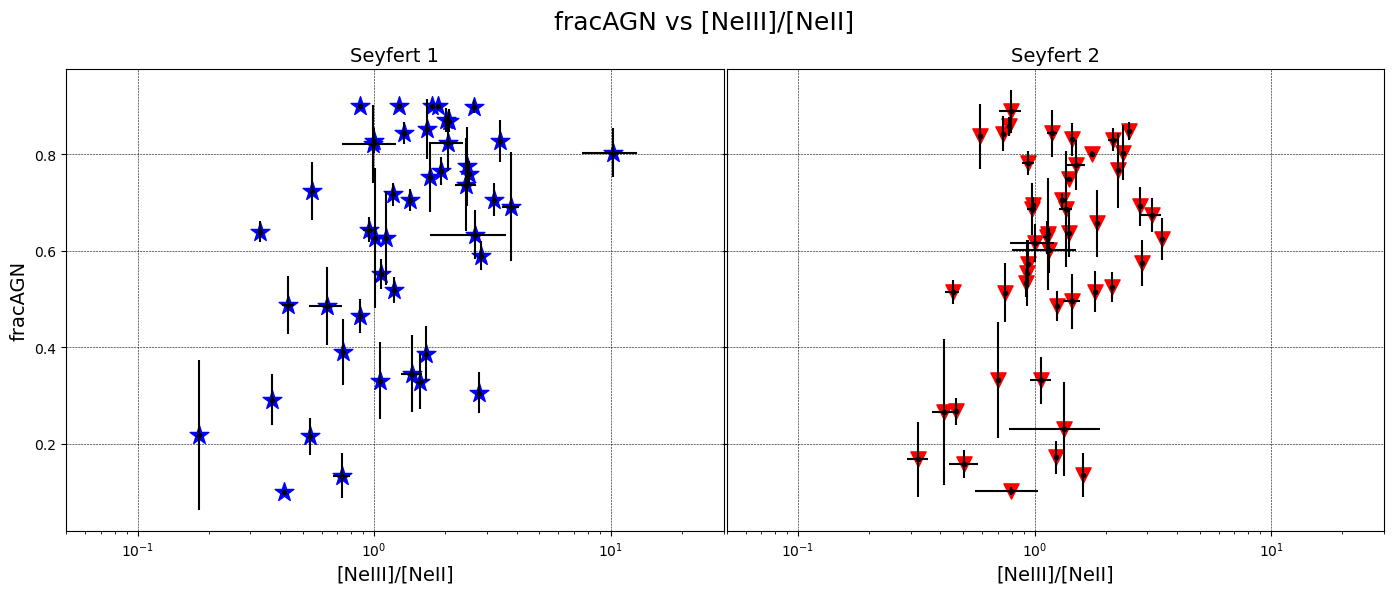

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeIII]/[NeII]', fontsize=18)
ax1.scatter(Ne_Sy1['[NeIII]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['[NeIII]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeIII]/[NeII]_err'], fmt='k.')
ax1.set_xlim(50e-3,3e1)
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeIII]/[NeII]', fontsize=14)
#ax1.set_yscale("log")
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeIII]/[NeII]_err'], fmt='k.')
ax2.set_xlim(50e-3,3e1)
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeIII]/[NeII]', fontsize=14)
#ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots
plt.savefig(path_graphs+'NeIII_NeII_vs_fracAGN_Sy1_vs_Sy2.jpg')

## Graphics of Ne Line Ratios Histograms and Ne Line Ratios vs fracAGN but now by bibcode in each galaxy

### [NeV]/[NeII]

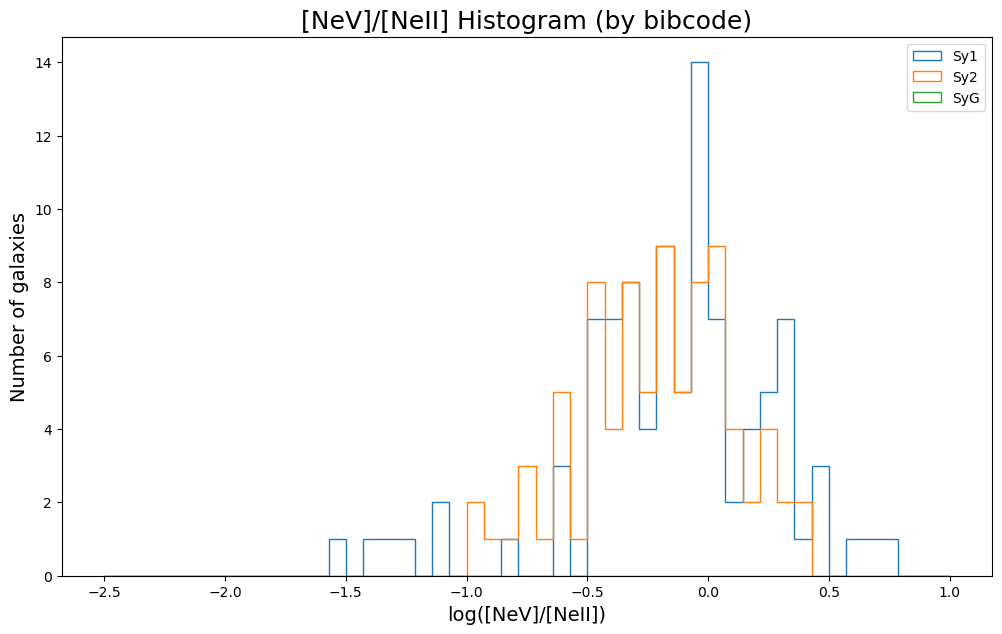

In [15]:
x_NeV_NeII_Sy1_bib = np.log10(Ne_Sy1_bib['[NeV]/[NeII]'])
x_NeV_NeII_Sy2_bib = np.log10(Ne_Sy2_bib['[NeV]/[NeII]'])
x_NeV_NeII_SyG_bib = np.log10(Ne_SyG_bib['[NeV]/[NeII]'])
bins_NeV_NeII_Sy1_bib = np.linspace(-2.5,1,50)
bins_NeV_NeII_Sy2_bib = np.linspace(-2.5,1,50)
bins_NeV_NeII_SyG_bib = np.linspace(-2.5,1,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeV_NeII_Sy1_bib, bins=bins_NeV_NeII_Sy1_bib, histtype='step', label='Sy1')
plt.hist(x_NeV_NeII_Sy2_bib, bins=bins_NeV_NeII_Sy2_bib, histtype='step', label='Sy2')
plt.hist(x_NeV_NeII_SyG_bib, bins=bins_NeV_NeII_SyG_bib, histtype='step', label='SyG')
plt.xlabel('log([NeV]/[NeII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeV]/[NeII] Histogram (by bibcode)', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeII_Sy_bib.jpg')

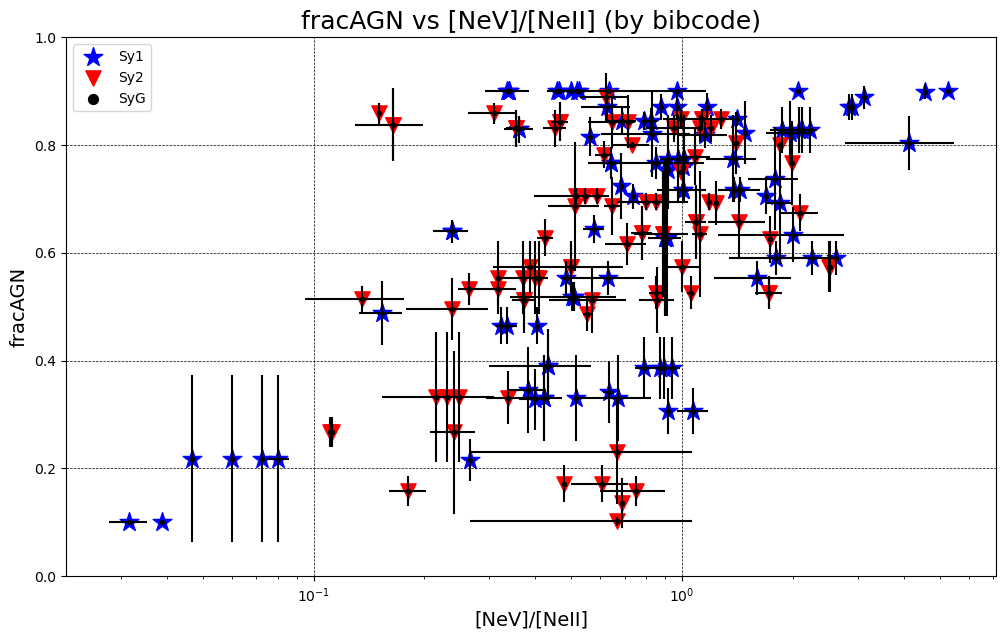

In [16]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1_bib['[NeV]/[NeII]'],Ne_Sy1_bib['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1_bib['[NeV]/[NeII]'], Ne_Sy1_bib['bayes.agn.fracAGN'],\
             Ne_Sy1_bib['bayes.agn.fracAGN_err'], Ne_Sy1_bib['[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_Sy2_bib['[NeV]/[NeII]'], Ne_Sy2_bib['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2_bib['[NeV]/[NeII]'], Ne_Sy2_bib['bayes.agn.fracAGN'],\
             Ne_Sy2_bib['bayes.agn.fracAGN_err'], Ne_Sy2_bib['[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_SyG_bib['[NeV]/[NeII]'], Ne_SyG_bib['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG_bib['[NeV]/[NeII]'], Ne_SyG_bib['bayes.agn.fracAGN'],\
             Ne_SyG_bib['bayes.agn.fracAGN_err'], Ne_SyG_bib['[NeV]/[NeII]_err'], fmt='k.')
plt.xlabel(r'[NeV]/[NeII]', fontsize=14)
plt.xscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeV]/[NeII] (by bibcode)', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy_bib.jpg')

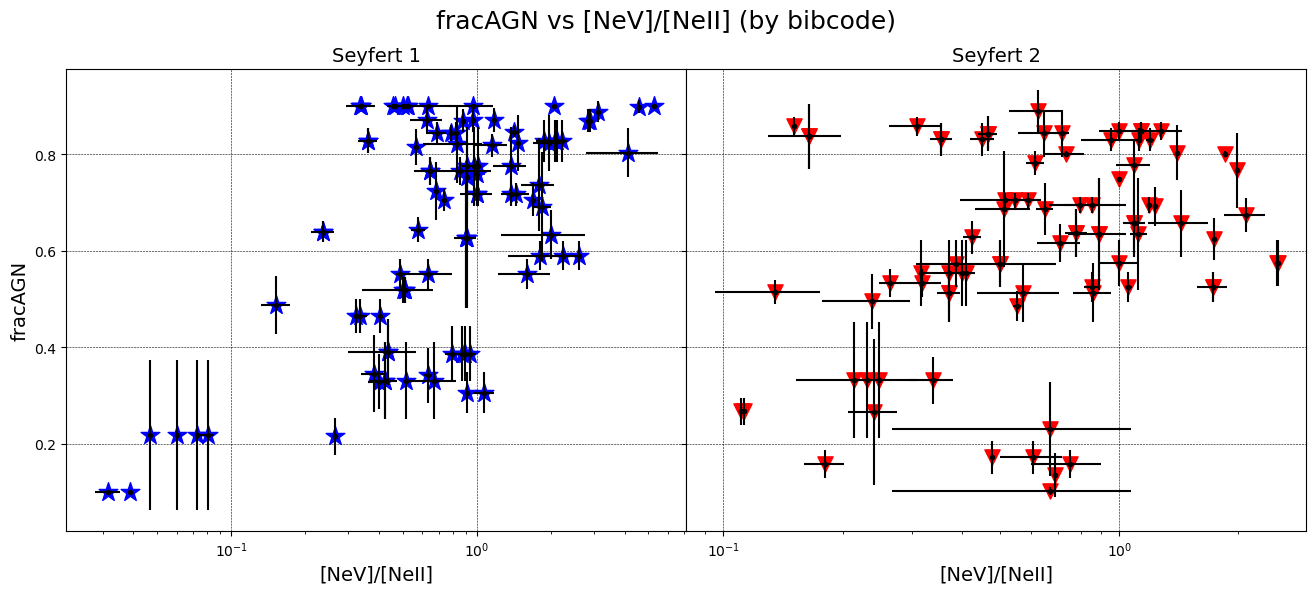

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeII] (by bibcode)', fontsize=18)
ax1.scatter(Ne_Sy1_bib['[NeV]/[NeII]'],Ne_Sy1_bib['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1_bib['[NeV]/[NeII]'], Ne_Sy1_bib['bayes.agn.fracAGN'],\
             Ne_Sy1_bib['bayes.agn.fracAGN_err'], Ne_Sy1_bib['[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2_bib['[NeV]/[NeII]'], Ne_Sy2_bib['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2_bib['[NeV]/[NeII]'], Ne_Sy2_bib['bayes.agn.fracAGN'],\
             Ne_Sy2_bib['bayes.agn.fracAGN_err'], Ne_Sy2_bib['[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy1_vs_Sy2_bib.jpg')

## Correlations

In [46]:
#Seyfert 1
log_NeVNeII_Sy1 = np.log10(Ne_Sy1['[NeV]/[NeII]'])
log_NeVNeIII_Sy1 = np.log10(Ne_Sy1['[NeV]/[NeIII]'])
log_NeIIINeII_Sy1 = np.log10(Ne_Sy1['[NeIII]/[NeII]'])
log_fracAGN_Sy1 = np.log10(Ne_Sy1['bayes.agn.fracAGN'])
log_sfr_Sy1 = np.log10(Ne_Sy1['bayes.sfh.sfr'])
log_sm_Sy1 = np.log10(Ne_Sy1['bayes.stellar.m_star'])

Ne_Sy1['log_[NeV]/[NeII]'] = log_NeVNeII_Sy1
Ne_Sy1['log_[NeV]/[NeIII]'] = log_NeVNeIII_Sy1
Ne_Sy1['log_[NeIII]/[NeII]'] = log_NeIIINeII_Sy1
Ne_Sy1['log_bayes.agn.fracAGN'] = log_fracAGN_Sy1
Ne_Sy1['log_bayes.sfh.sfr'] = log_sfr_Sy1
Ne_Sy1['log_bayes.stellar.m_star'] = log_sm_Sy1

#Seyfert 2
log_NeVNeII_Sy2 = np.log10(Ne_Sy2['[NeV]/[NeII]'])
log_NeVNeIII_Sy2 = np.log10(Ne_Sy2['[NeV]/[NeIII]'])
log_NeIIINeII_Sy2 = np.log10(Ne_Sy2['[NeIII]/[NeII]'])
log_fracAGN_Sy2 = np.log10(Ne_Sy2['bayes.agn.fracAGN'])
log_sfr_Sy2 = np.log10(Ne_Sy2['bayes.sfh.sfr'])
log_sm_Sy2 = np.log10(Ne_Sy2['bayes.stellar.m_star'])

Ne_Sy2['log_[NeV]/[NeII]'] = log_NeVNeII_Sy2
Ne_Sy2['log_[NeV]/[NeIII]'] = log_NeVNeIII_Sy2
Ne_Sy2['log_[NeIII]/[NeII]'] = log_NeIIINeII_Sy2
Ne_Sy2['log_bayes.agn.fracAGN'] = log_fracAGN_Sy2
Ne_Sy2['log_bayes.sfh.sfr'] = log_sfr_Sy2
Ne_Sy2['log_bayes.stellar.m_star'] = log_sm_Sy2

In [47]:
df_Ne_Sy1 = Ne_Sy1.to_pandas()
df_Ne_Sy2 = Ne_Sy2.to_pandas()

#attributes=['log_[NeV]/[NeII]', 'log_[NeV]/[NeIII]', 'log_[NeIII]/[NeII]', 'bayes.agn.fracAGN']
#scatMatrix_Sy1=pd.plotting.scatter_matrix(df_Ne_Sy1[attributes], figsize=(10,8))

In [48]:
#scatMatrix_Sy2=pd.plotting.scatter_matrix(df_Ne_Sy2[attributes], figsize=(10,8))

In [49]:
NeVNeII_corr_Sy1 = df_Ne_Sy1.corr()['log_[NeV]/[NeII]']
NeVNeII_corr_Sy1

RA                         -0.089948
DEC                         0.065148
redshift                    0.367738
[NeV]/[NeII]                0.824950
[NeV]/[NeII]_err            0.753579
[NeV]/[NeIII]               0.580334
[NeV]/[NeIII]_err           0.479010
[NeIII]/[NeII]              0.646057
[NeIII]/[NeII]_err          0.676571
bayes.agn.fracAGN           0.639668
bayes.agn.fracAGN_err      -0.150859
bayes.agn.i                 0.103022
bayes.agn.i_err            -0.293259
bayes.sfh.sfr               0.112066
bayes.sfh.sfr_err           0.145751
bayes.stellar.m_star        0.154682
bayes.stellar.m_star_err    0.260817
best.reduced_chi_square    -0.085739
log.reduced_chi_square     -0.066686
log_[NeV]/[NeII]            1.000000
log_[NeV]/[NeIII]           0.685603
log_[NeIII]/[NeII]          0.846605
log_bayes.agn.fracAGN       0.689466
log_bayes.sfh.sfr           0.020930
log_bayes.stellar.m_star    0.300476
Name: log_[NeV]/[NeII], dtype: float64

In [50]:
NeVNeII_corr_Sy2 = df_Ne_Sy2.corr()['log_[NeV]/[NeII]']
NeVNeII_corr_Sy2

RA                          0.113178
DEC                        -0.300084
redshift                    0.027843
[NeV]/[NeII]                0.924913
[NeV]/[NeII]_err            0.400285
[NeV]/[NeIII]               0.592495
[NeV]/[NeIII]_err           0.102189
[NeIII]/[NeII]              0.794876
[NeIII]/[NeII]_err          0.395660
bayes.agn.fracAGN           0.304689
bayes.agn.fracAGN_err      -0.137449
bayes.agn.i                 0.203979
bayes.agn.i_err            -0.334661
bayes.sfh.sfr               0.118605
bayes.sfh.sfr_err           0.034204
bayes.stellar.m_star        0.016559
bayes.stellar.m_star_err    0.013012
best.reduced_chi_square    -0.057857
log.reduced_chi_square     -0.015094
log_[NeV]/[NeII]            1.000000
log_[NeV]/[NeIII]           0.616692
log_[NeIII]/[NeII]          0.832392
log_bayes.agn.fracAGN       0.262119
log_bayes.sfh.sfr           0.005492
log_bayes.stellar.m_star   -0.008747
Name: log_[NeV]/[NeII], dtype: float64

In [51]:
NeVNeIII_corr_Sy1 = df_Ne_Sy1.corr()['log_[NeV]/[NeIII]']
NeVNeIII_corr_Sy1

RA                         -0.103102
DEC                         0.017260
redshift                    0.229624
[NeV]/[NeII]                0.545417
[NeV]/[NeII]_err            0.348438
[NeV]/[NeIII]               0.909743
[NeV]/[NeIII]_err           0.739088
[NeIII]/[NeII]              0.118718
[NeIII]/[NeII]_err          0.159130
bayes.agn.fracAGN           0.445427
bayes.agn.fracAGN_err       0.125906
bayes.agn.i                 0.137168
bayes.agn.i_err            -0.078371
bayes.sfh.sfr               0.116445
bayes.sfh.sfr_err           0.038317
bayes.stellar.m_star        0.243952
bayes.stellar.m_star_err    0.178229
best.reduced_chi_square    -0.120038
log.reduced_chi_square     -0.118016
log_[NeV]/[NeII]            0.685603
log_[NeV]/[NeIII]           1.000000
log_[NeIII]/[NeII]          0.201470
log_bayes.agn.fracAGN       0.551178
log_bayes.sfh.sfr           0.128701
log_bayes.stellar.m_star    0.125355
Name: log_[NeV]/[NeIII], dtype: float64

In [52]:
NeVNeIII_corr_Sy2 = df_Ne_Sy2.corr()['log_[NeV]/[NeIII]']
NeVNeIII_corr_Sy2

RA                          0.134371
DEC                         0.057670
redshift                    0.247254
[NeV]/[NeII]                0.527085
[NeV]/[NeII]_err            0.239820
[NeV]/[NeIII]               0.975417
[NeV]/[NeIII]_err           0.331221
[NeIII]/[NeII]              0.120733
[NeIII]/[NeII]_err          0.125436
bayes.agn.fracAGN           0.155698
bayes.agn.fracAGN_err      -0.007026
bayes.agn.i                 0.043051
bayes.agn.i_err            -0.108720
bayes.sfh.sfr               0.299781
bayes.sfh.sfr_err           0.241207
bayes.stellar.m_star        0.245521
bayes.stellar.m_star_err    0.192487
best.reduced_chi_square    -0.030838
log.reduced_chi_square      0.048513
log_[NeV]/[NeII]            0.616692
log_[NeV]/[NeIII]           1.000000
log_[NeIII]/[NeII]          0.111999
log_bayes.agn.fracAGN       0.097229
log_bayes.sfh.sfr           0.297301
log_bayes.stellar.m_star    0.203446
Name: log_[NeV]/[NeIII], dtype: float64

In [53]:
NeIIINeII_corr_Sy1 = df_Ne_Sy1.corr()['log_[NeIII]/[NeII]']
NeIIINeII_corr_Sy1

RA                         -0.022617
DEC                         0.020278
redshift                    0.379051
[NeV]/[NeII]                0.721243
[NeV]/[NeII]_err            0.790200
[NeV]/[NeIII]               0.124538
[NeV]/[NeIII]_err           0.191188
[NeIII]/[NeII]              0.822266
[NeIII]/[NeII]_err          0.784537
bayes.agn.fracAGN           0.519959
bayes.agn.fracAGN_err      -0.138809
bayes.agn.i                 0.208706
bayes.agn.i_err            -0.294156
bayes.sfh.sfr               0.081720
bayes.sfh.sfr_err           0.209508
bayes.stellar.m_star        0.060023
bayes.stellar.m_star_err    0.204832
best.reduced_chi_square     0.039191
log.reduced_chi_square      0.056164
log_[NeV]/[NeII]            0.846605
log_[NeV]/[NeIII]           0.201470
log_[NeIII]/[NeII]          1.000000
log_bayes.agn.fracAGN       0.524617
log_bayes.sfh.sfr           0.025005
log_bayes.stellar.m_star    0.253740
Name: log_[NeIII]/[NeII], dtype: float64

In [54]:
NeIIINeII_corr_Sy2 = df_Ne_Sy2.corr()['log_[NeIII]/[NeII]']
NeIIINeII_corr_Sy2

RA                         -0.045983
DEC                        -0.338186
redshift                   -0.269285
[NeV]/[NeII]                0.831045
[NeV]/[NeII]_err            0.220803
[NeV]/[NeIII]               0.089019
[NeV]/[NeIII]_err          -0.240565
[NeIII]/[NeII]              0.948289
[NeIII]/[NeII]_err          0.392757
bayes.agn.fracAGN           0.384893
bayes.agn.fracAGN_err      -0.194377
bayes.agn.i                 0.293789
bayes.agn.i_err            -0.490073
bayes.sfh.sfr              -0.201436
bayes.sfh.sfr_err          -0.272795
bayes.stellar.m_star       -0.234919
bayes.stellar.m_star_err   -0.196223
best.reduced_chi_square    -0.085047
log.reduced_chi_square     -0.089672
log_[NeV]/[NeII]            0.832392
log_[NeV]/[NeIII]           0.111999
log_[NeIII]/[NeII]          1.000000
log_bayes.agn.fracAGN       0.393481
log_bayes.sfh.sfr          -0.228766
log_bayes.stellar.m_star   -0.248159
Name: log_[NeIII]/[NeII], dtype: float64

## Notebook Info

In [27]:
%reload_ext watermark
%watermark -a "Jonhatan Bernal" -d -v -m
print('Specific Python packages')
%watermark -iv -w --packages astropy

Author: Jonhatan Bernal

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 7.31.1

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.15.0-56-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
astropy: 5.1

matplotlib: 3.5.2
astropy   : 5.1
pandas    : 1.4.4
numpy     : 1.21.5

Watermark: 2.3.1



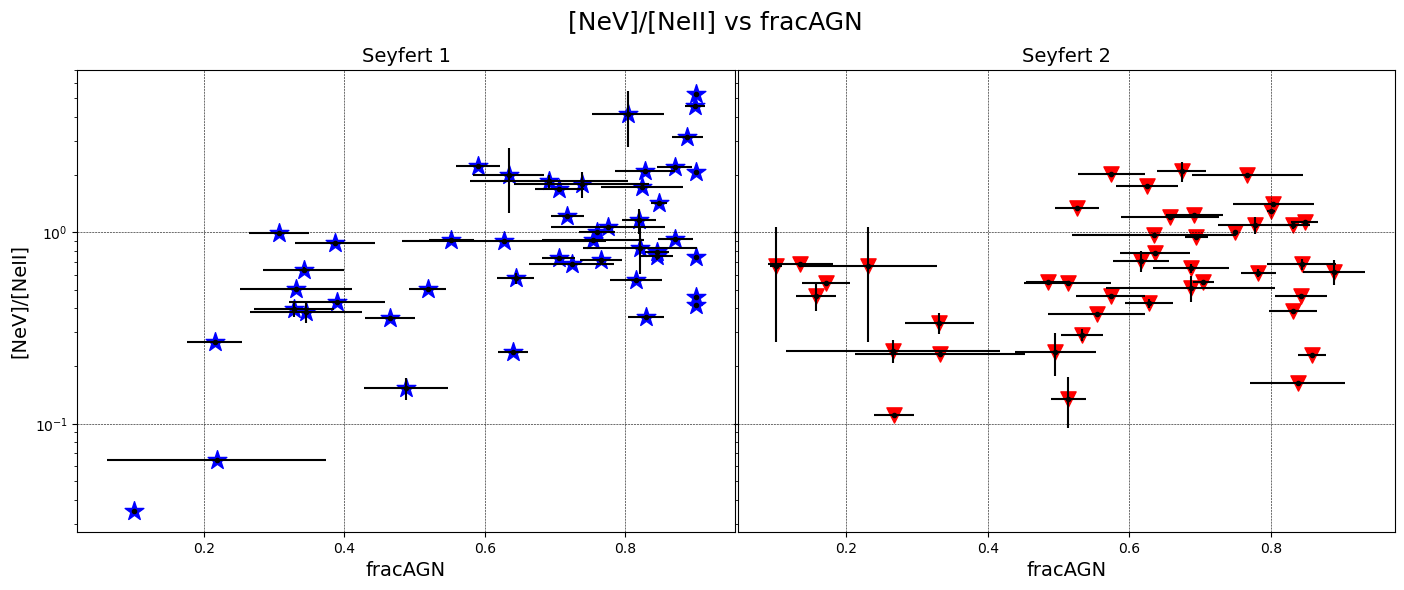

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'[NeV]/[NeII] vs fracAGN', fontsize=18)
ax1.scatter(Ne_Sy1['bayes.agn.fracAGN'],Ne_Sy1['[NeV]/[NeII]'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['bayes.agn.fracAGN'], Ne_Sy1['[NeV]/[NeII]'],\
             Ne_Sy1['[NeV]/[NeII]_err'], Ne_Sy1['bayes.agn.fracAGN_err'], fmt='k.')
#ax1.set_xlim(20e-4,10e0)
#ax1.set_xscale("log")
ax1.set_xlabel(r'fracAGN', fontsize=14)
ax1.set_yscale("log")
ax1.set_ylabel(r'[NeV]/[NeII]', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['bayes.agn.fracAGN'], Ne_Sy2['[NeV]/[NeII]'], 120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['bayes.agn.fracAGN'], Ne_Sy2['[NeV]/[NeII]'], \
             Ne_Sy2['[NeV]/[NeII]_err'], Ne_Sy2['bayes.agn.fracAGN_err'], fmt='k.')
#ax2.set_xlim(20e-4,10e0)
#ax2.set_xscale("log")
ax2.set_xlabel(r'fracAGN', fontsize=14)
ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots

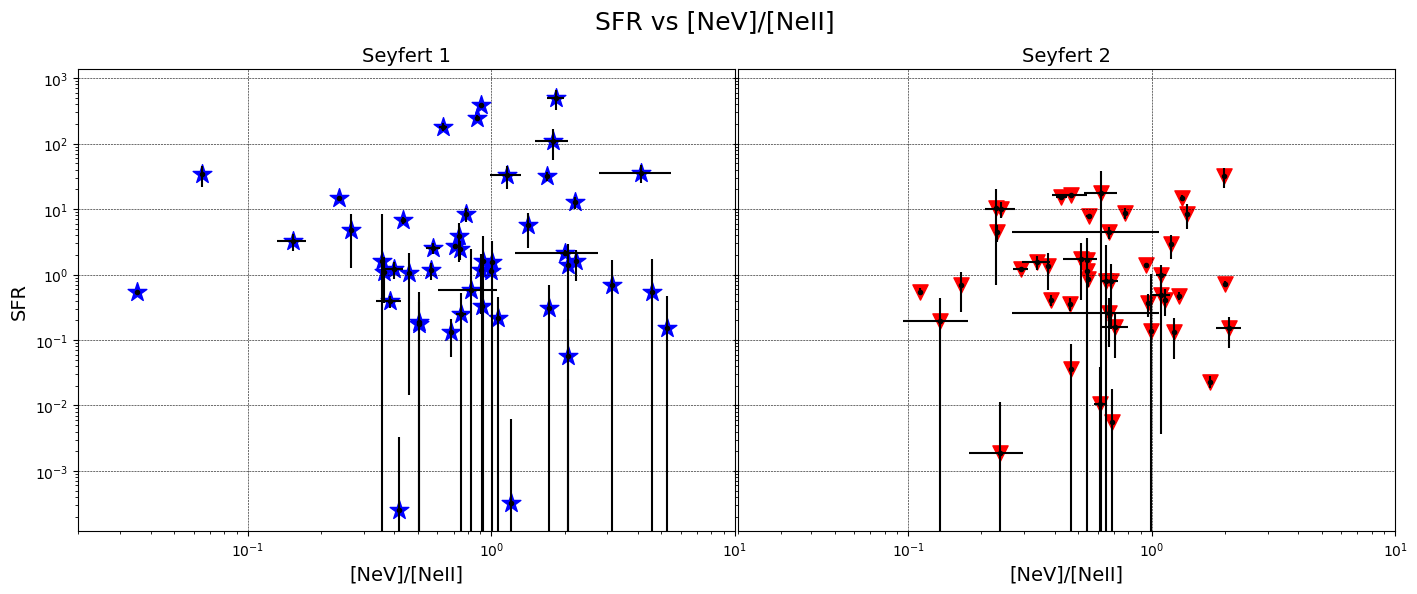

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'SFR vs [NeV]/[NeII]', fontsize=18)
ax1.scatter(Ne_Sy1['[NeV]/[NeII]'],Ne_Sy1['bayes.sfh.sfr'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['[NeV]/[NeII]'], Ne_Sy1['bayes.sfh.sfr'],\
             Ne_Sy1['bayes.sfh.sfr_err'], Ne_Sy1['[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xlim(20e-3,10e0) #ax1.set_xlim(20e-4,10e0)
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
ax1.set_yscale("log")
ax1.set_ylabel(r'SFR', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.sfh.sfr'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.sfh.sfr'],\
             Ne_Sy2['bayes.sfh.sfr_err'], Ne_Sy2['[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xlim(20e-3,10e0)#ax2.set_xlim(20e-4,10e0)
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_sfr_Sy1_vs_Sy2.jpg')